# * 제출 시 주의사항
## 1. 파일이름을 이름_학번.ipynb로 수정하여 제출할것
## 2. 시험감독하는 조교에게 파일 또는 e-mail로 전달할것 

### 문제 1.

#### 1. “서울일자리센터 인재정보 직종별, 지역별 목록.csv” 파일을 읽어서 아래의 문제를 해결하는 코드를 작성하시오. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 지원되는걸로 교체

df=pd.read_csv('서울일자리센터 인재정보 직종별, 지역별 목록.csv',encoding='cp949')
df

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
2,H110202107071953,여,68,J00100,관계없음,서울,서초구,서울,강남구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:27.0,57:30.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,H001202104121072,여,54,J00102,초등학교,서울,도봉구,서울,전체,561101,...,신입,J03404,알선,청소,NaN,NaN,NaN,NaN,25:40.0,39:47.0
1352,H310202104090587,여,61,J00104,중학교,서울,도봉구,서울,전체,550104,...,10년0월,J03404,알선,긴시간,NaN,NaN,NaN,NaN,37:31.0,19:48.0
1353,H001202101250403,여,47,J00110,대학_대학교,서울,전체,경기,광명시,27200,...,15년0월,J03404,알선,전산입력,부동산중개,컴퓨터활용,자료편집,고객민원상담,59:11.0,10:01.0
1354,H001202101250036,여,47,J00108,전문대학,서울,노원구,서울,중랑구,231101,...,1년2월,J03402,승인,NaN,NaN,NaN,NaN,NaN,10:47.0,08:06.0


####   (a) 전체 구직자에서 남녀의 수와 비율을 계산하고, 이를 각각 시각화 하시오.

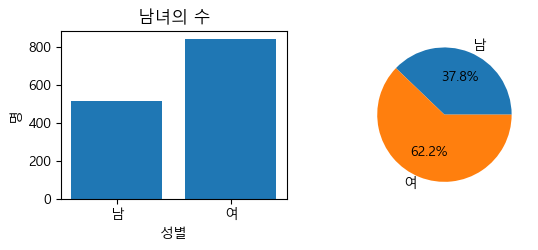

In [45]:
male = len(df[df['성별'].str.contains('남')])
female = len(df[df['성별'].str.contains('여')])

plt.subplot(221)
plt.bar(['남','여'],[male,female])
plt.xlabel('성별'), plt.ylabel('명'), plt.title('남녀의 수')

plt.subplot(222)
plt.pie([male,female], labels=['남','여'],autopct='%.1f%%')
plt.show()

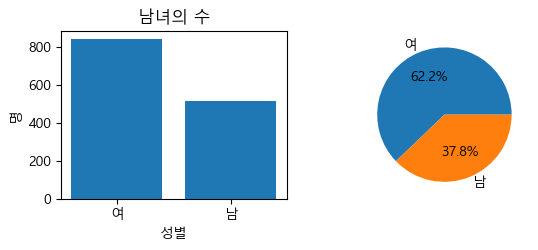

In [46]:
# 깔끔한 답
result = df['성별'].value_counts()

plt.subplot(221)
plt.bar(result.index,result )
plt.xlabel('성별'), plt.ylabel('명'), plt.title('남녀의 수')

plt.subplot(222)
plt.pie(result , labels=result.index,autopct='%.1f%%')
plt.show()

####   (b) 전체 구직자에서 10대에서 90대까지 연령별 숫자와 비율을 계산하여 시각화 하시오. 

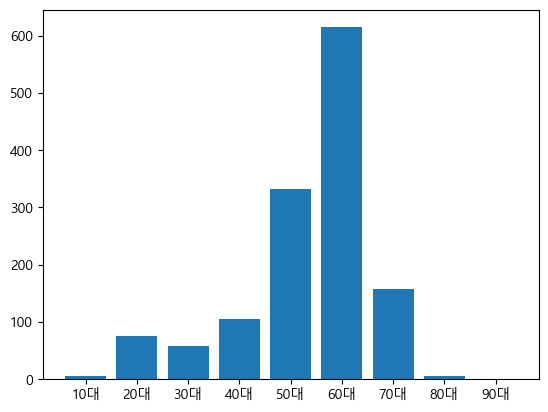

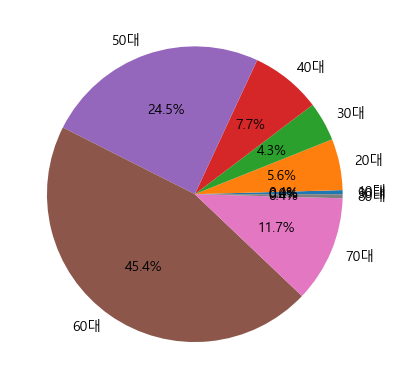

In [105]:
ages = df['나이']
bins = np.arange(10,101,10)
group_names = ['10대', '20대','30대','40대','50대','60대','70대','80대','90대']
cats = pd.cut(ages,bins,right=False, labels=group_names)
cats
number = pd.value_counts(cats).sort_index()

plt.bar(number.index,number.values)
plt.show()

#explode = [0.1 for _ in range(9)]
plt.pie(number.values,labels=number.index, autopct='%.1f%%')
plt.show()

####   (c)“A 전자” 인사과에서는 나이, 지역, 희망 직종 상관없이 학력이 고졸 이상이고, 60개월 이상의 경력직 구직자를 찾는다. 해당 구직자들을 찾아서 화면에 출력하시오.

In [2]:
#  고졸 이상 출력
edu = df[df['학력공통코드명'].str.contains('고등학교|대학_대학교|전문대학|과정')]
edu

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0
5,H108202107071928,여,63,J00106,고등학교,서울,서대문구,서울,NaN,25500,...,0년5월,J03402,승인,NaN,NaN,NaN,NaN,NaN,43:12.0,43:19.0
6,H129202107071902,남,69,J00106,고등학교,서울,송파구,서울,강동구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,38:42.0,38:46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,H306202104131663,여,66,J00106,고등학교,서울,동대문구,서울,전체,616101,...,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,48:36.0,10:21.0
1350,H324202104121333,남,60,J00108,전문대학,서울,송파구,서울,NaN,561102,...,10년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,43:43.0,50:44.0
1353,H001202101250403,여,47,J00110,대학_대학교,서울,전체,경기,광명시,27200,...,15년0월,J03404,알선,전산입력,부동산중개,컴퓨터활용,자료편집,고객민원상담,59:11.0,10:01.0
1354,H001202101250036,여,47,J00108,전문대학,서울,노원구,서울,중랑구,231101,...,1년2월,J03402,승인,NaN,NaN,NaN,NaN,NaN,10:47.0,08:06.0


In [3]:
df['희망직종경력년_월수'].value_counts()

신입       583
1년0월      93
10년0월     78
5년0월      69
2년0월      68
        ... 
1년9월       1
4년8월       1
35년6월      1
6년2월       1
11년2월      1
Name: 희망직종경력년_월수, Length: 98, dtype: int64

In [4]:
career = df['희망직종경력년_월수']
career = df.drop(career[career=='신입'].index) # 신입 drop
result = career['희망직종경력년_월수'].str[:2].str.replace('년','').astype(int) # 앞에 두글자만 출력하고, 년을 제거. 후 int로 변환.
df.iloc[result[result>=5].index] # 5년 이상인 것만 출력.

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
9,H129202107071899,남,63,J00106,고등학교,서울,송파구,서울,강동구,561101,...,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,33:48.0,33:52.0
15,H311202107071854,남,54,J00106,고등학교,서울,노원구,서울,NaN,562300,...,10년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,15:31.0,15:36.0
17,H315202107071833,여,56,J00104,중학교,서울,양천구,서울,강서구,531200,...,8년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,09:28.0,09:31.0
21,H307202107071829,여,55,J00106,고등학교,서울,중랑구,서울,NaN,615100,...,30년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,01:15.0,01:20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,H001202104231487,남,50,J00106,고등학교,서울,전체,경기,전체,622901,...,5년0월,J03404,알선,태국어통역,자가용운전기사,태국어번역,태국직원,NaN,53:01.0,10:28.0
1349,H306202104131663,여,66,J00106,고등학교,서울,동대문구,서울,전체,616101,...,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,48:36.0,10:21.0
1350,H324202104121333,남,60,J00108,전문대학,서울,송파구,서울,NaN,561102,...,10년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,43:43.0,50:44.0
1352,H310202104090587,여,61,J00104,중학교,서울,도봉구,서울,전체,550104,...,10년0월,J03404,알선,긴시간,NaN,NaN,NaN,NaN,37:31.0,19:48.0


In [15]:
result[result>=5].value_counts()

10    80
5     73
6     30
20    30
7     22
15    17
8     17
30    15
11    12
9     11
18     7
12     7
35     6
21     5
17     4
14     4
25     3
13     3
16     3
40     3
34     2
24     1
29     1
22     1
32     1
44     1
19     1
33     1
42     1
27     1
Name: 희망직종경력년_월수, dtype: int64

### 문제 2.

#### 아래의 코드를 참고하여 답하시오.

In [187]:
import pandas as pd
ndf1 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=0)
ndf1

,노래,A,B,C,D,E
0,이효리,6,9,7,6,6
1,양현석,8,9,7,10,9
2,이승철,10,10,9,6,9
3,서인영,10,7,7,9,7
4,김범수,8,9,8,10,8


In [188]:
ndf1 = ndf1.set_index('노래')
ndf1

,A,B,C,D,E
노래,,,,,
이효리,6,9,7,6,6
양현석,8,9,7,10,9
이승철,10,10,9,6,9
서인영,10,7,7,9,7
김범수,8,9,8,10,8


In [189]:
ndf1 = ndf1.stack().reset_index()
ndf1.columns=["심사자", "참가자", "노래점수"]
ndf1

,심사자,참가자,노래점수
0,이효리,A,6
1,이효리,B,9
2,이효리,C,7
3,이효리,D,6
4,이효리,E,6
5,양현석,A,8
6,양현석,B,9
7,양현석,C,7
8,양현석,D,10
9,양현석,E,9


In [210]:
ndf2 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=1)
ndf2

,댄스,A,B,C,D,E
0,이효리,7,8,6,8,9
1,양현석,7,8,9,9,8
2,이승철,10,6,10,8,9
3,서인영,10,6,6,7,8
4,김범수,8,8,7,7,9


In [211]:
ndf2 = ndf2.set_index('댄스')
ndf2 = ndf2.stack().reset_index()
ndf2.columns=["심사자", "참가자", "댄스점수"]
ndf2

,심사자,참가자,댄스점수
0,이효리,A,7
1,이효리,B,8
2,이효리,C,6
3,이효리,D,8
4,이효리,E,9
5,양현석,A,7
6,양현석,B,8
7,양현석,C,9
8,양현석,D,9
9,양현석,E,8


In [191]:
ndf3 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=2)
ndf3

,스타성,A,B,C,D,E
0,이효리,9,9,6,10,8
1,양현석,8,7,6,10,9
2,이승철,7,10,10,7,10
3,서인영,10,10,7,8,8
4,김범수,9,8,10,8,8


In [212]:
ndf3 = ndf3.set_index('스타성')
ndf3 = ndf3.stack().reset_index()
ndf3.columns=["심사자", "참가자", "스타성점수"]
ndf3

,심사자,참가자,스타성점수
0,이효리,A,9
1,이효리,B,9
2,이효리,C,6
3,이효리,D,10
4,이효리,E,8
5,양현석,A,8
6,양현석,B,7
7,양현석,C,6
8,양현석,D,10
9,양현석,E,9


In [214]:
ndf4 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=3)
ndf4

,심사자,성별
0,이효리,여
1,양현석,남
2,이승철,남
3,서인영,여
4,김범수,남


In [231]:
result = pd.merge(ndf1,ndf2)
result = pd.merge(result,ndf3)
result = pd.merge(result,ndf4)
result

,심사자,참가자,노래점수,댄스점수,스타성점수,성별
0,이효리,A,6,7,9,여
1,이효리,B,9,8,9,여
2,이효리,C,7,6,6,여
3,이효리,D,6,8,10,여
4,이효리,E,6,9,8,여
5,양현석,A,8,7,8,남
6,양현석,B,9,8,7,남
7,양현석,C,7,9,6,남
8,양현석,D,10,9,10,남
9,양현석,E,9,8,9,남


#### (a) merge 함수를 사용하여 아래의 테이블 모양으로 출력하는 코드를 작성하시오. 
<img src="2번_1.jpg" align="left" width="300"/>

#### (b) 아래의 테이블은  각 심사자 남여 구분에 따른 참가자들의 해당항목 점수 평균값을 나타낸것이다. 출력하는 코드를 작성하시오.  
<img src="2번_2.jpg" align="left" width="300"/>

In [241]:
result.pivot_table(index='참가자',columns='성별', aggfunc='mean')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13800\340869667.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  result.pivot_table(index='참가자',columns='성별', aggfunc='mean')


노래점수           댄스점수          스타성점수     
성별          남    여         남    여         남    여
참가자                                             
A    8.666667  8.0  8.333333  8.5  8.000000  9.5
B    9.333333  8.0  7.333333  7.0  8.333333  9.5
C    8.000000  7.0  8.666667  6.0  8.666667  6.5
D    8.666667  7.5  8.000000  7.5  8.333333  9.0
E    8.666667  6.5  8.666667  8.5  9.000000  8.0